c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\_version_utils.py:47: FutureWarning: The argument `x_0` is deprecated for __init__; use `u_0` instead.
  warnings.warn(f'The argument `{alias}` is deprecated for {func_name}; use `{new}` instead.', FutureWarning)
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\networks.py:44: FutureWarning: `n_hidden_units` and `n_hidden_layers` are deprecated, pass `hidden_units=(50, 50, 50, 50, 50, 50, 50)` instead
  warn(f"`n_hidden_units` and `n_hidden_layers` are deprecated, "
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\solve

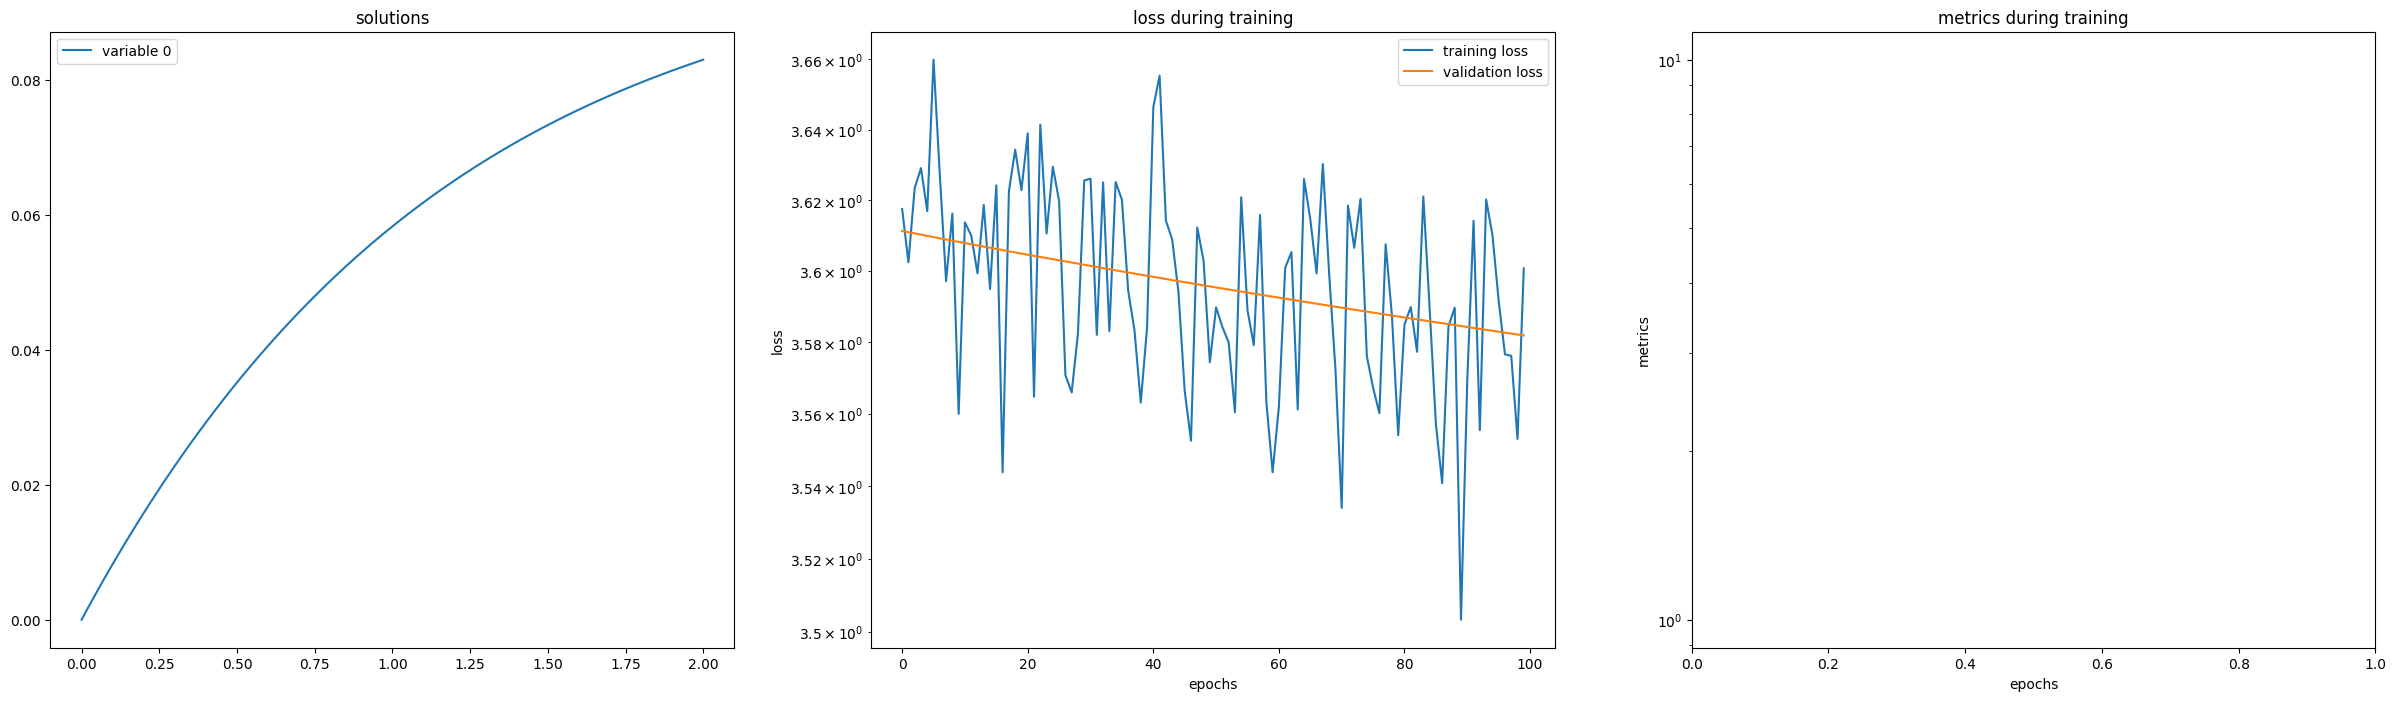

Training Progress: 100%|██████████| 1000/1000 [00:09<00:00, 104.14it/s]
c:\Users\whrow\Desktop\ml_graduate\NeuralODE-introduction\feat-chomingi\.venv\lib\site-packages\neurodiffeq\_version_utils.py:47: FutureWarning: The argument `as_type` is deprecated for __call__; use `to_numpy` instead.
  warnings.warn(f'The argument `{alias}` is deprecated for {func_name}; use `{new}` instead.', FutureWarning)


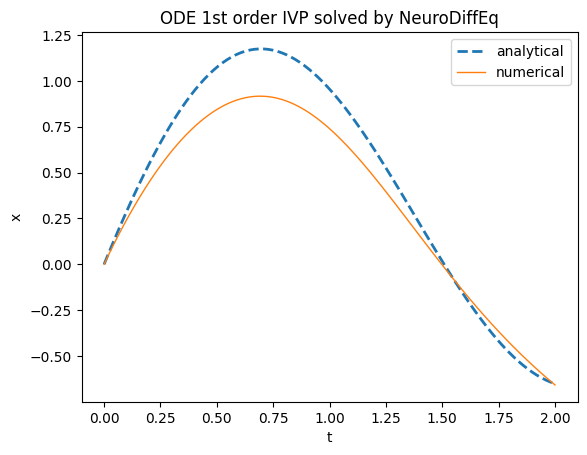

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from neurodiffeq import diff
from neurodiffeq.ode import solve
from neurodiffeq.ode import IVP
import neurodiffeq.networks as ndenw
from neurodiffeq.monitors import Monitor1D

# Constants
T_BEGIN = 0.0
T_END = 2.0
T_NSAMPLES = 100
X_INIT_VAL = 0.0
N_HIDDEN_LAYERS = 6
N_HIDDEN_UNITS = 50
BATCH_SIZE = 30
MAX_EPOCHS = 1000
CHECK_EVERY = 100

# 주어진 ODE
ode_fn = lambda x, t: diff(x, t, order=1) + x - torch.sin(t) - 3. * torch.cos(2. * t)

# Analytical 정해
an_sol = lambda t: (1./2.) * np.sin(t) - (1./2.) * np.cos(t) + \
                    (3./5.) * np.cos(2.*t) + (6./5.) * np.sin(2.*t) - \
                    (1./10.) * np.exp(-t)

t_space = np.linspace(T_BEGIN, T_END, T_NSAMPLES)
x_an_sol = an_sol(t_space)

x_init = IVP(t_0=T_BEGIN, x_0=X_INIT_VAL)

net = ndenw.FCNN(n_hidden_layers=N_HIDDEN_LAYERS, n_hidden_units=N_HIDDEN_UNITS, actv=torch.nn.Tanh)
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Using Monitor1D for monitoring
monitor = Monitor1D(t_min=T_BEGIN, t_max=T_END, check_every=CHECK_EVERY)

num_sol, loss_sol = solve(
    ode_fn, x_init, t_min=T_BEGIN, t_max=T_END,
    batch_size=BATCH_SIZE,
    max_epochs=MAX_EPOCHS,
    return_best=True,
    net=net,
    optimizer=optimizer,
    monitor=monitor)

x_num_sol = num_sol(t_space, as_type='np')

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical')
plt.title('ODE 1st order IVP solved by NeuroDiffEq')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()



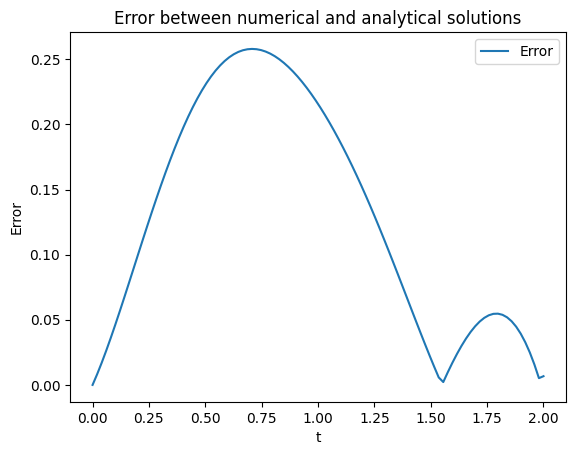

In [8]:

# 오차 계산
error = np.abs(x_num_sol - x_an_sol)

# 오차 그래프 그리기
plt.figure()
plt.plot(t_space, error, label='Error')
plt.title('Error between numerical and analytical solutions')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()
plt.show()
